<a href="https://colab.research.google.com/github/Fullkopi/Sharing/blob/main/Patch_based_MLP_Denoising_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize and reshape the data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Add noise to randomly chosen 8x8 patches
def add_patch_noise(images, patch_size=8, noise_factor=0.5):
    noisy_images = np.copy(images)
    for i in range(len(images)):
        x, y = np.random.randint(0, 28 - patch_size, 2)
        patch = noisy_images[i, x:x+patch_size, y:y+patch_size]
        noisy_patch = patch + noise_factor * np.ones((patch_size, patch_size)).reshape(8,8,1)
        noisy_patch = np.clip(noisy_patch, 0.0, 1.0)
        noisy_images[i, x:x+patch_size, y:y+patch_size] = noisy_patch
    return noisy_images

In [ ]:
# Add noise to the training and testing data
noise_factor = 0.7
train_noisy = add_patch_noise(train_images, noise_factor=noise_factor)
test_noisy = add_patch_noise(test_images, noise_factor=noise_factor)

In [ ]:
# Define the MLP denoising autoencoder model
def build_denoising_autoencoder():
    input_img = tf.keras.Input(shape=(28, 28, 1))

    # Encoder
    x = layers.Flatten()(input_img)
    encoded = layers.Dense(128, activation='relu')(x)

    # Decoder
    x = layers.Dense(128, activation='relu')(encoded)
    decoded = layers.Dense(28 * 28, activation='sigmoid')(x)
    decoded = layers.Reshape((28, 28, 1))(decoded)

    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    return autoencoder

In [ ]:
# Create and compile the denoising autoencoder model
autoencoder = build_denoising_autoencoder()

In [ ]:
# Train the autoencoder
autoencoder.fit(train_noisy, train_images, epochs=10, batch_size=128, shuffle=True, validation_data=(test_noisy, test_images))

Epoch 1/10
469/469 [==============================] - 9s 5ms/step - loss: 0.0426 - val_loss: 0.0224
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0183 - val_loss: 0.0150
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0138 - val_loss: 0.0127
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0118 - val_loss: 0.0109
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0105 - val_loss: 0.0099
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0096 - val_loss: 0.0092
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0090 - val_loss: 0.0086
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0085 - val_loss: 0.0083
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0078 - val_loss: 0.0076

In [ ]:
# Evaluate the model
score = autoencoder.evaluate(test_noisy, test_images)
print(f"Test loss: {score}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0076
Test loss: 0.007606444414705038


In [ ]:
# Use the trained autoencoder to denoise images
denoised_images = autoencoder.predict(test_noisy)

313/313 [==============================] - 1s 2ms/step


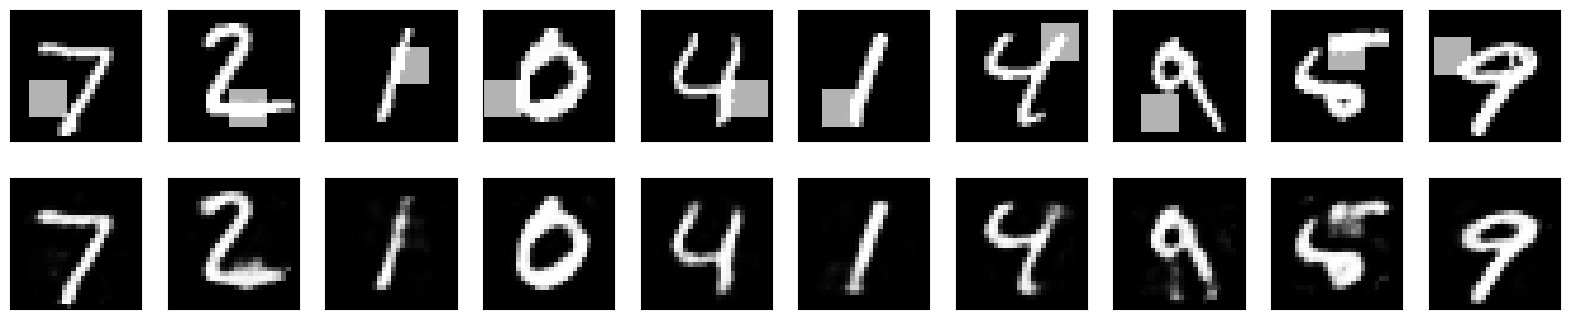

In [ ]:
# Optionally, visualize the results
import matplotlib.pyplot as plt

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(denoised_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()